This notebook contains the training files of both InSight and Apollo mission using the STA/LTA algorithm.

# Imports

In [1]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
ipython-sql 0.5.0 requires sqlalc

In [2]:
import numpy as np
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import matplotlib.pyplot as plt
import psutil
import time

# Mars

## File evid 005

Event detected at 704.6597869414853
Event ended at 854.2118640536673


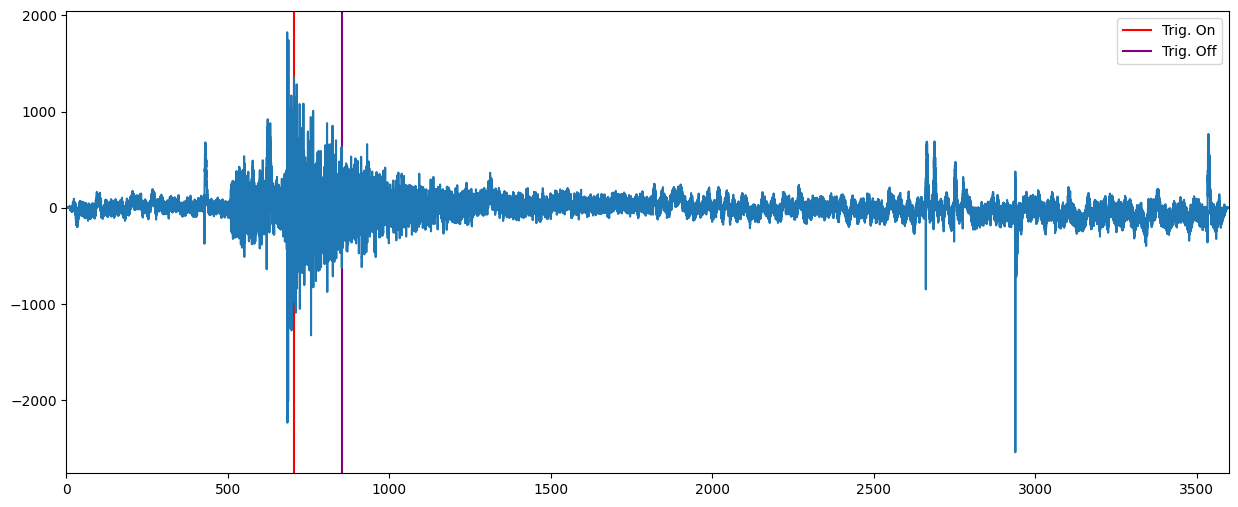

In [3]:
file_path = r'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/mars/training/data/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed'
st = read(file_path)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## File evid 006

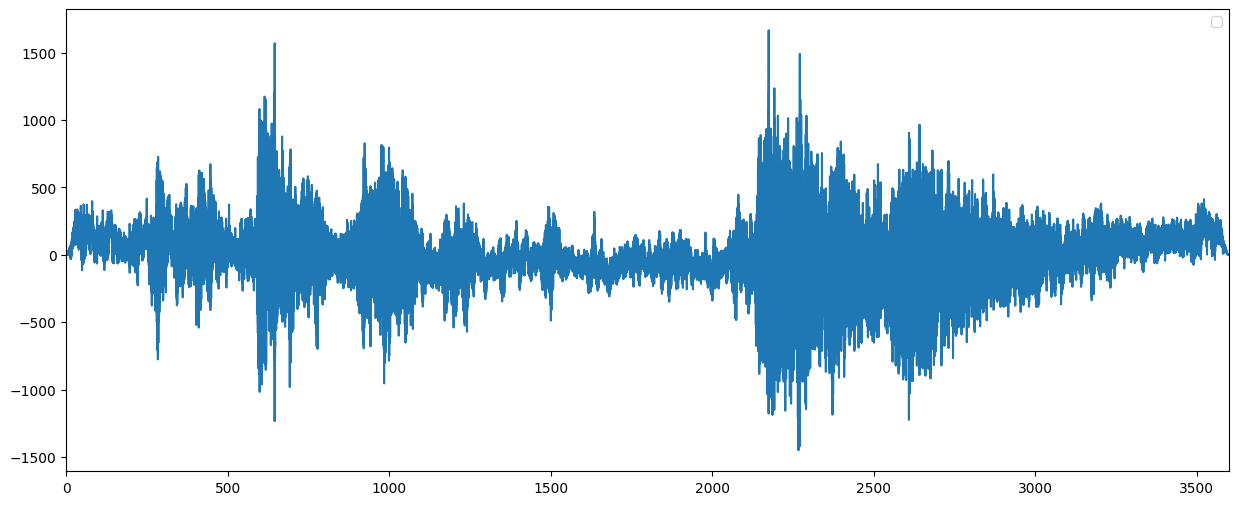

In [4]:
file_path = r'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/mars/training/data/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed'
st = read(file_path)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

Text(0, 0.5, 'Characteristic function')

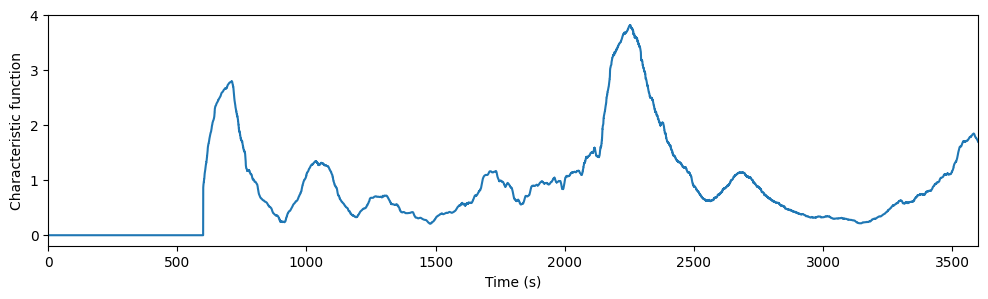

In [5]:
# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

Since the threshold was set to start at 4, and the event was below 4, the algorithm was unable to detect the events, unlike the isolation forest, which adapts on its own to every trace.

# Apollo

## evid00009

Event detected at 72201.33368000109
Event ended at 72700.50436335299


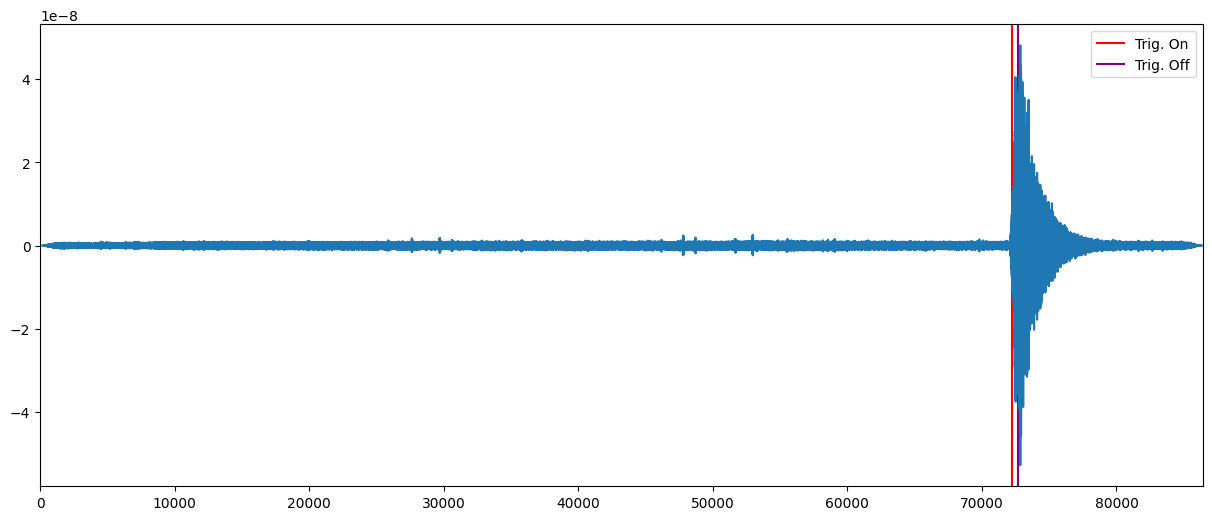

In [6]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-06-26HR00_evid00009.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

Text(0, 0.5, 'Characteristic function')

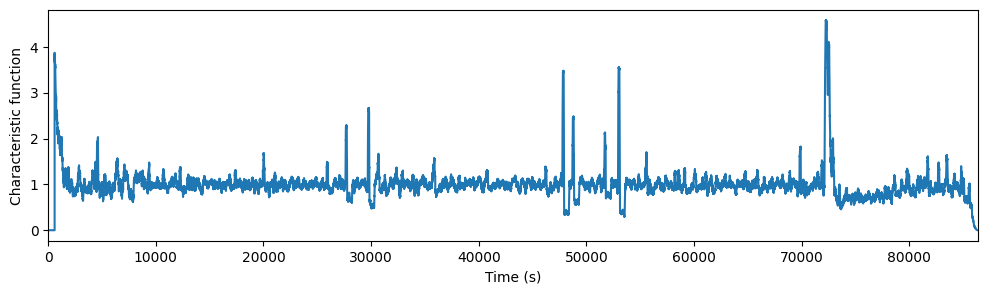

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

## evid 00010

Event detected at 12352.62535357787
Event ended at 12451.946281808165
Event detected at 18513.390833394587
Event ended at 19050.146488085957
Event detected at 42347.99851010606
Event ended at 42645.357520157246
Event detected at 77879.0794507038
Event ended at 77998.32494204411


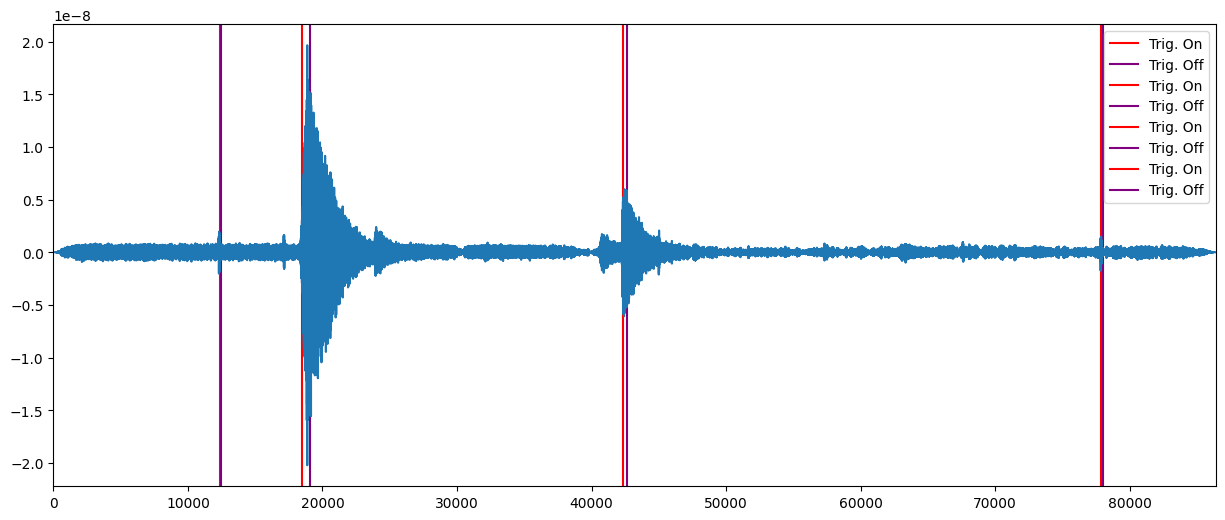

In [8]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00010.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00011

Event detected at 12352.62535357787
Event ended at 12451.946281808165
Event detected at 18513.390833394587
Event ended at 19050.146488085957
Event detected at 42347.99851010606
Event ended at 42645.357520157246
Event detected at 77879.0794507038
Event ended at 77998.32494204411


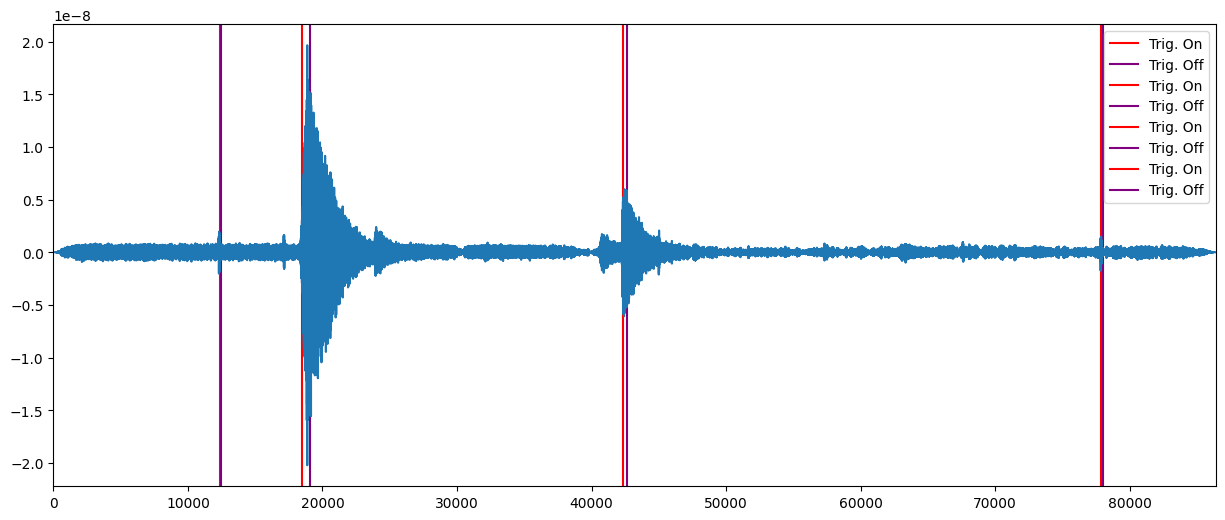

In [9]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00011.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00013

Event detected at 681.0577935542079
Event ended at 851.4731856026788
Event detected at 24881.401957376347
Event ended at 25003.666321910678


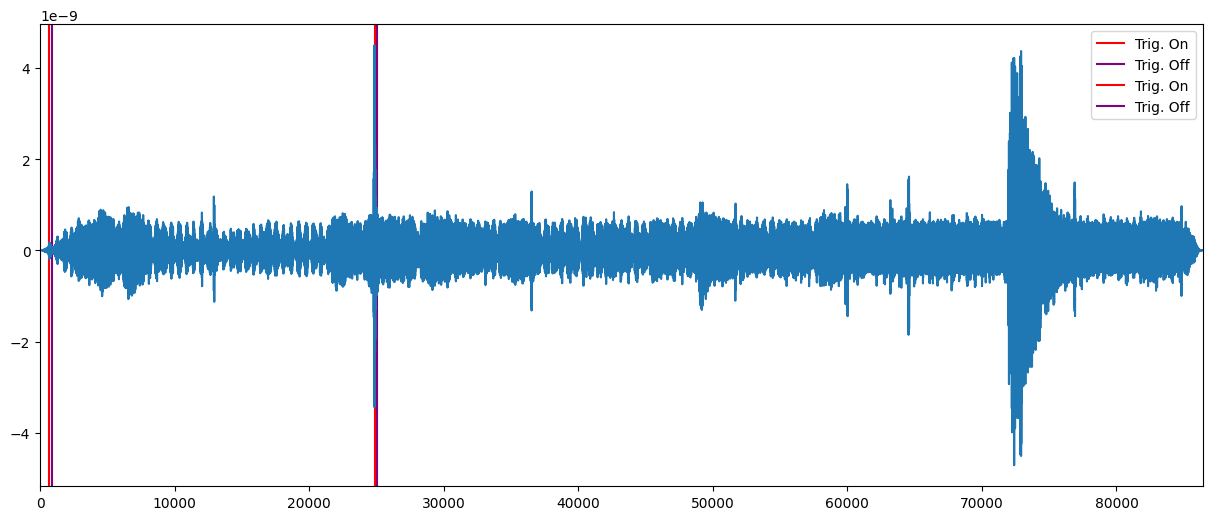

In [10]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-09-26HR00_evid00013.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

Text(0, 0.5, 'Characteristic function')

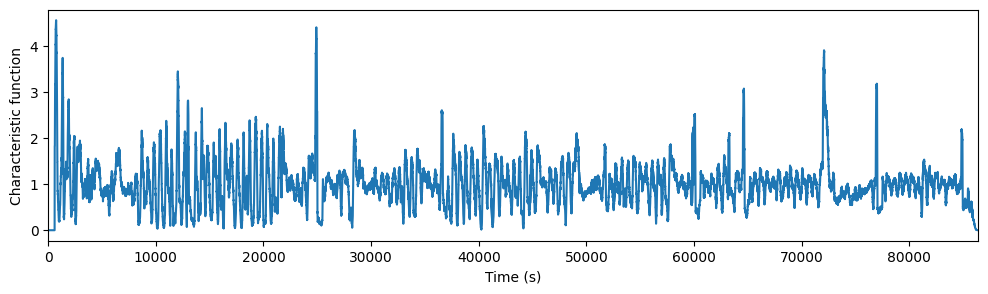

In [11]:
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

## evid 00014

Event detected at 16961.840952565195
Event ended at 17104.48271118989
Event detected at 17408.181354949553
Event ended at 18069.465529060435
Event detected at 34426.626179984865
Event ended at 34543.15468544335
Event detected at 38302.55747941861
Event ended at 38438.40677334689
Event detected at 49596.16211465628
Event ended at 49782.42659099795
Event detected at 61811.42873736738
Event ended at 62145.46705677103
Event detected at 62224.86342188911
Event ended at 62478.14688323539
Event detected at 63855.20589268839
Event ended at 63979.130637482966
Event detected at 72116.95617476669
Event ended at 72283.74891897864
Event detected at 79682.85618461236
Event ended at 79803.00733790893


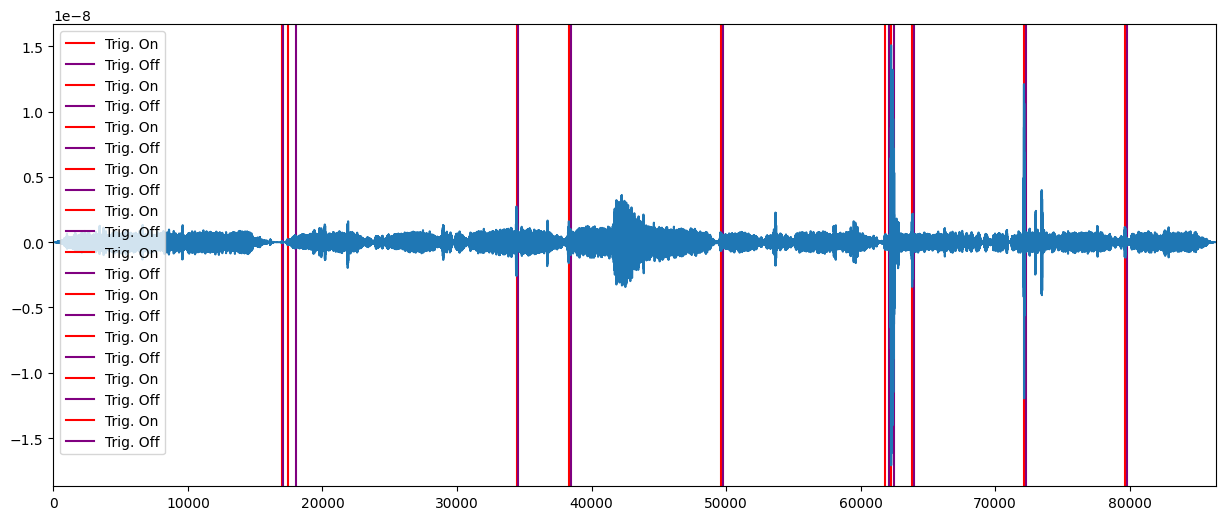

In [12]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-10-24HR00_evid00014.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00015

Event detected at 10198.055551816171
Event ended at 10342.96146534365
Event detected at 11741.60541820367
Event ended at 11904.020796282384
Event detected at 15561.38567625198
Event ended at 15720.782181132206
Event detected at 16882.897418890603
Event ended at 17011.652360806165
Event detected at 53939.56593034482
Event ended at 54066.05671736151
Event detected at 63993.168399613285
Event ended at 64183.50835477802
Event detected at 64825.924571416515
Event ended at 64972.79275252301
Event detected at 66537.92756227971
Event ended at 66726.60713718527
Event detected at 68100.04349883791
Event ended at 68248.87394752343
Event detected at 70124.65080940466
Event ended at 70254.4623569397
Event detected at 71015.21840295896
Event ended at 71122.38840150532
Event detected at 71606.7666062029
Event ended at 71711.21961887063
Event detected at 72657.33447927712
Event ended at 72721.33459108509
Event detected at 73352.58097688918
Event ended at 73535.07186173784
Event detected at 74551.97929

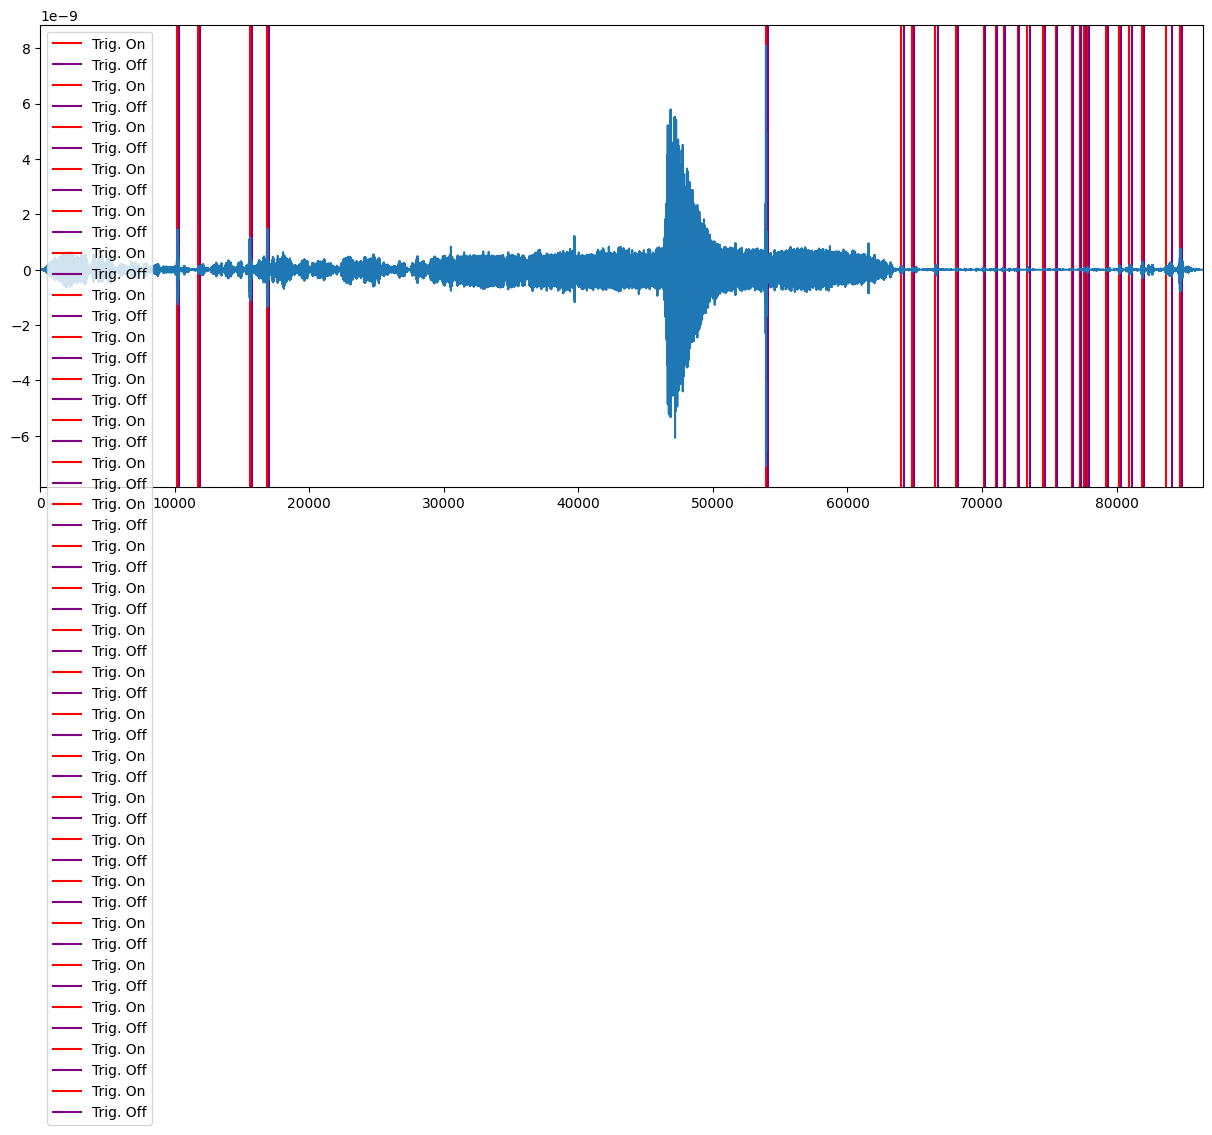

In [13]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-11-12HR00_evid00015.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00017

Event detected at 23722.003706118234
Event ended at 23871.286985781702
Event detected at 26645.178624179585
Event ended at 27446.387571048825
Event detected at 48776.236154713464
Event ended at 48986.0478420059
Event detected at 51752.24135374773
Event ended at 51815.18485993546
Event detected at 53819.71666370778
Event ended at 53965.98107017279
Event detected at 58786.81968078126
Event ended at 58954.367143295356
Event detected at 64957.54744207765
Event ended at 65066.377820881855


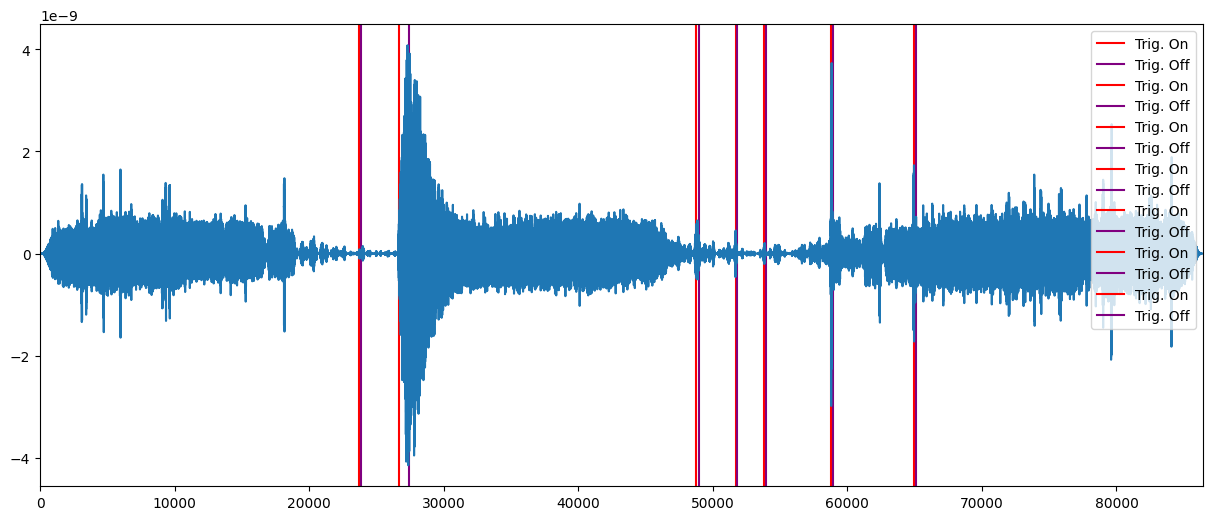

In [14]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-12-11HR00_evid00017.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00019

Event detected at 23434.75792071333
Event ended at 23553.39963740961
Event detected at 74220.05418775685
Event ended at 74537.33776090643


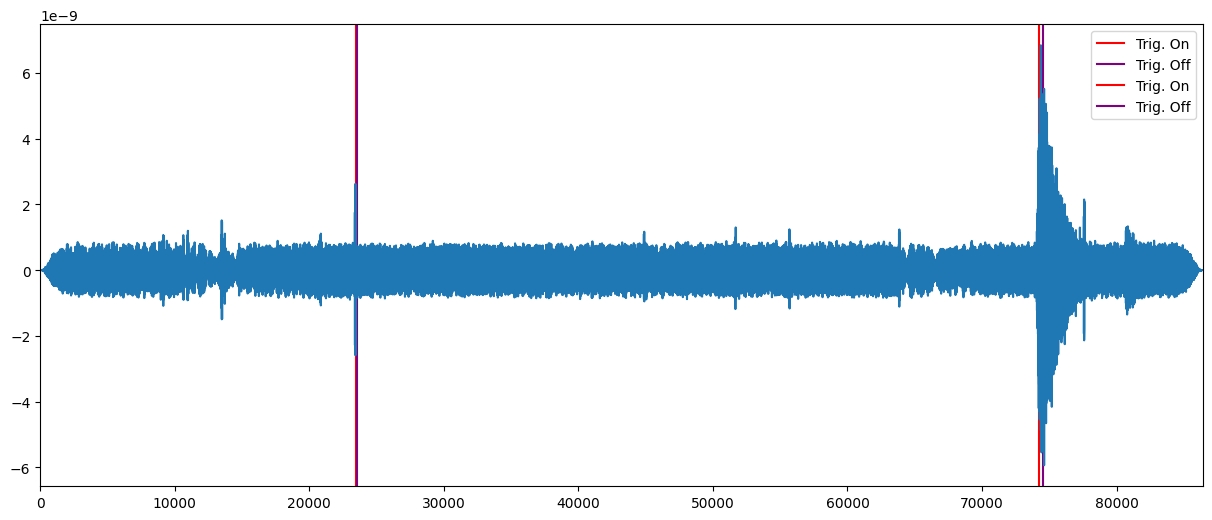

In [15]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-12-27HR00_evid00019.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

## evid 00021

Event detected at 8705.22275516329
Event ended at 9100.393256845518
Event detected at 55901.38067838299
Event ended at 56069.83380285868
Event detected at 56667.72163981946
Event ended at 56991.49579035742


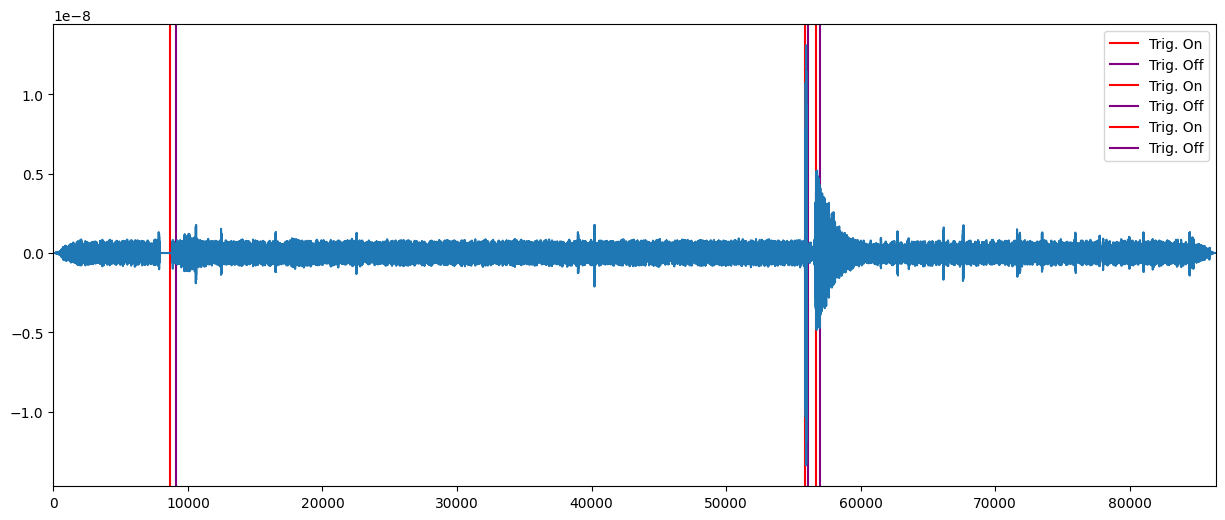

In [16]:
mseed_file = f'/kaggle/input/space-apps-2024-seismic-detection/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-12-31HR00_evid00021.mseed'
st = read(mseed_file)
tr = st[0]
tr_data = tr.data
tr_times = np.linspace(0, len(tr_data) / tr.stats.sampling_rate, num=len(tr_data))
df = tr.stats.sampling_rate
sta_len = 120
lta_len = 600
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
fig,ax = plt.subplots(1,1,figsize=(15,6))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    print(f'Event detected at {tr_times[triggers[0]]}')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    print(f'Event ended at {tr_times[triggers[1]]}')
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()